# Kønsfordeling og karakterforskelle i Information, Politiken, Berlignske og Jyllands-Posten

In [29]:
#!pip install sklearn
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from genderUtils import *

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning

In [30]:
path =  '../../bog_nu//goldstandard.csv'
df = pd.read_csv(path, sep="\t")
my_palette2 = ['teal', 'lightcoral']
my_palette4 = ['teal','lightseagreen','whitesmoke','mistyrose'] #whitesmoke, darkgray, gainsboro
sns.set_theme(style="darkgrid")

In [31]:
# create a dataframe for reviews written in the categories 'Avis' and 'Regional avis'
df_np = df[(df['media_type_name']== 'Avis')|(df['media_type_name'] == 'Regional avis')]
df_np.shape

(24753, 30)

## Hvad med 'Information'?

Her gentager vi nogle af ovenstående analyser udelukkende på anmeldelser udgivet i Information. 

Karakterer og kønskombination: 

- Kvindelig anmelder og kvindelig forfatter: **4.0480**
- Kvindelig anmelder og mandlig forfatter: **ikke statisktisk signifikant**
- Mandlig anmelder og kvindelig forfatter: **ikke statisktisk signifikant**
- Mandlig anmelder og mandlig forfatter: 4.0480 + 0.1187 = **4.1667**


In [32]:
# select reviews written in 'Information'
df_inf = df[(df['media_name'] == 'Information')] # 2283 in total

model_h2 = smf.ols(formula='grades_transformed_6 ~ C(gender_combi)', data=df_inf)
res_h2 = model_h2.fit()

res_h2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     grades_transformed_6   R-squared:                       0.002
Model:                              OLS   Adj. R-squared:                  0.001
Method:                   Least Squares   F-statistic:                     1.661
Date:                  Fri, 06 May 2022   Prob (F-statistic):              0.173
Time:                          10:31:05   Log-Likelihood:                -2799.2
No. Observations:                  1994   AIC:                             5606.
Df Residuals:                      1990   BIC:                             5629.
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          4.0480      0.044     91.802      0.000       3.962       4.134
C(gender_combi)[T.female_male]     0.0337      0.068      0.492      0.623      -0.101       0.168
C(gender_combi)[T.male_female]     0.0804      0.070      1.154      0.249      -0.056       0.217
C(gender_combi)[T.male_male]       0.1187      0.056      2.113      0.035       0.009       0.229
==============================================================================
Omnibus:                       61.278   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.218
Skew:                          -0.437   Prob(JB):                     4.18e-15
Kurtosis:                       3.183   Cond. No.                         4.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[Text(0, 0, 'Kvinde, Mand'),
 Text(1, 0, 'Mand, Mand'),
 Text(2, 0, 'Mand, Kvinde'),
 Text(3, 0, 'Kvinde, Kvinde')]

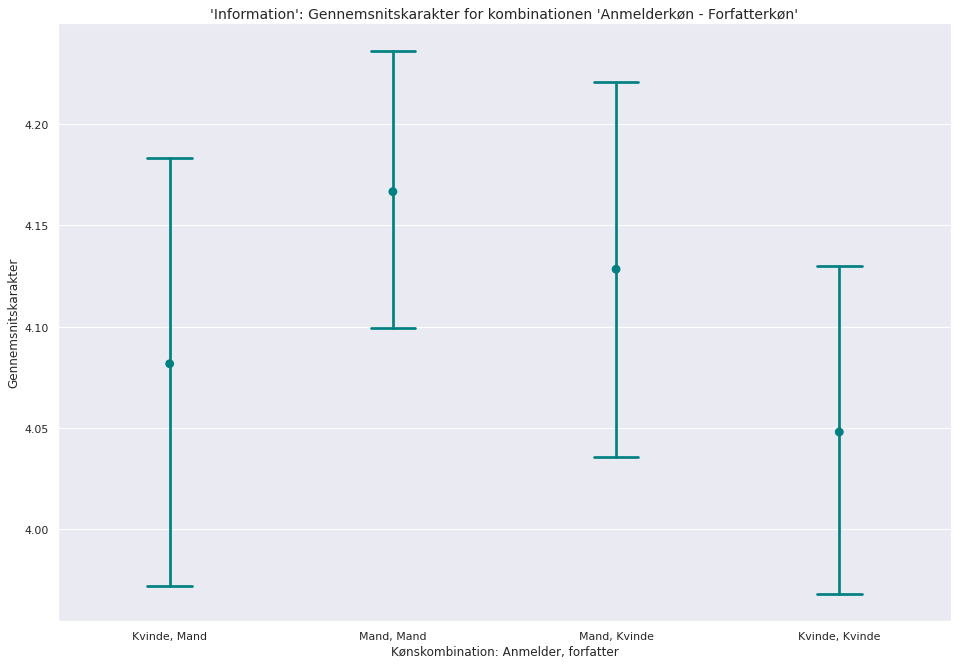

In [33]:
ax = sns.pointplot(x="gender_combi", y="grades_transformed_6", data=df_inf, join=False, ci = 95,capsize=0.2, marker = 'o', color = 'teal')

ax.figure.set_size_inches(16,11)
ax.set_title("'Information': Gennemsnitskarakter for kombinationen 'Anmelderkøn - Forfatterkøn'",fontdict= { 'fontsize': 14, 'fontweight':'normal'})
ax.set_ylabel('Gennemsnitskarakter')
ax.set_xlabel('Kønskombination: Anmelder, forfatter')
ax.set_xticklabels(['Kvinde, Mand','Mand, Mand','Mand, Kvinde','Kvinde, Kvinde'])


Text(0.5, 1.0, "Kønsbalance i 'Information' (normaliseret), 2010-2021")

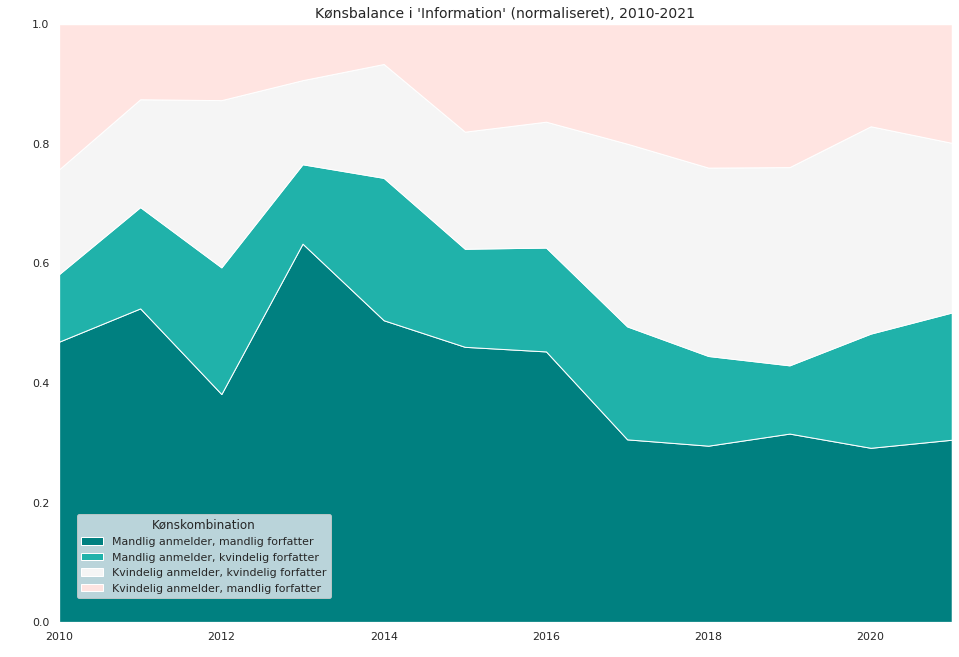

In [34]:
grouped_inf = df_inf.groupby(['year','gender_combi']).size().unstack()
normalized_inf = grouped_inf.div(grouped_inf.sum(axis=1),axis=0)

my_labels = ['Mandlig anmelder, mandlig forfatter','Mandlig anmelder, kvindelig forfatter','Kvindelig anmelder, kvindelig forfatter','Kvindelig anmelder, mandlig forfatter']

fig, ax = plt.subplots(figsize=(16,11))
sub_to_plot = normalized_inf[['male_male','male_female','female_female','female_male']]
ax.stackplot(sub_to_plot.index, sub_to_plot.T, labels=sub_to_plot.columns,colors= my_palette4)
fig.legend(my_labels, title="Kønskombination", loc=(0.08,0.09))

ax.autoscale(enable=True, axis='both', tight=True)
ax.set_title("Kønsbalance i 'Information' (normaliseret), 2010-2021",fontdict= { 'fontsize': 14, 'fontweight':'normal'})


## Politiken

Her gentager vi nogle af ovenstående analyser udelukkende på anmeldelser udgivet i Politiken. 

Karakterer og kønskombination: 

- Kvindelig anmelder og kvindelig forfatter: **4.0692**
- Kvindelig anmelder og mandlig forfatter: **ikke statisktisk signifikant**
- Mandlig anmelder og kvindelig forfatter: **ikke statisktisk signifikant**
- Mandlig anmelder og mandlig forfatter: 4.0692 + 0.1311 = **4.2003**

In [35]:
# select reviews written in 'Politiken'
df_pol = df[(df['media_name'] == 'Politiken')] # 2283 in total

model_h2 = smf.ols(formula='grades_transformed_6 ~ C(gender_combi)', data=df_pol)
res_h2 = model_h2.fit()

res_h2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     grades_transformed_6   R-squared:                       0.005
Model:                              OLS   Adj. R-squared:                  0.004
Method:                   Least Squares   F-statistic:                     7.558
Date:                  Fri, 06 May 2022   Prob (F-statistic):           4.84e-05
Time:                          10:31:06   Log-Likelihood:                -6493.5
No. Observations:                  4698   AIC:                         1.299e+04
Df Residuals:                      4694   BIC:                         1.302e+04
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          4.0692      0.031    132.301      0.000       4.009       4.129
C(gender_combi)[T.female_male]    -0.0449      0.049     -0.908      0.364      -0.142       0.052
C(gender_combi)[T.male_female]     0.0532      0.044      1.218      0.223      -0.032       0.139
C(gender_combi)[T.male_male]       0.1311      0.037      3.526      0.000       0.058       0.204
==============================================================================
Omnibus:                       75.138   Durbin-Watson:                   1.630
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.461
Skew:                          -0.316   Prob(JB):                     9.17e-18
Kurtosis:                       3.034   Cond. No.                         5.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[Text(0, 0, 'Mand, Mand'),
 Text(1, 0, 'Kvinde, Mand'),
 Text(2, 0, 'Kvinde, Kvinde'),
 Text(3, 0, 'Mand, Kvinde')]

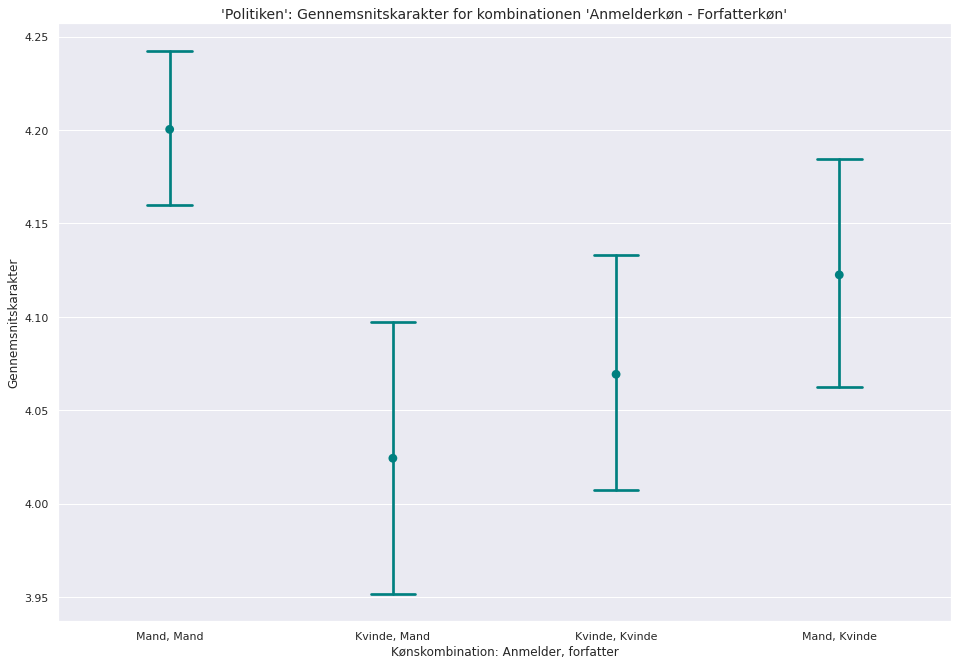

In [36]:
ax = sns.pointplot(x="gender_combi", y="grades_transformed_6", data=df_pol, join=False, ci = 95,capsize=0.2, marker = 'o', color = 'teal')

ax.figure.set_size_inches(16,11)
ax.set_title("'Politiken': Gennemsnitskarakter for kombinationen 'Anmelderkøn - Forfatterkøn'",fontdict= { 'fontsize': 14, 'fontweight':'normal'})
ax.set_ylabel('Gennemsnitskarakter')
ax.set_xlabel('Kønskombination: Anmelder, forfatter')
ax.set_xticklabels(['Mand, Mand','Kvinde, Mand','Kvinde, Kvinde','Mand, Kvinde'])

Text(0.5, 1.0, "Kønsbalance i 'Politiken' (normaliseret), 2010-2021")

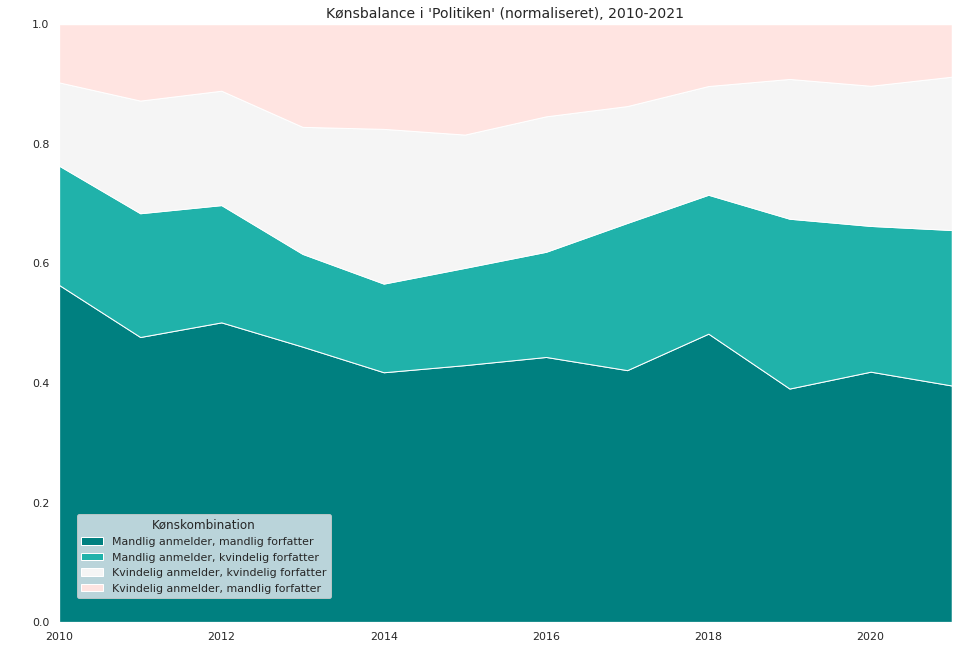

In [37]:
grouped_pol = df_pol.groupby(['year','gender_combi']).size().unstack()
normalized_pol = grouped_pol.div(grouped_pol.sum(axis=1),axis=0)

my_labels = ['Mandlig anmelder, mandlig forfatter','Mandlig anmelder, kvindelig forfatter','Kvindelig anmelder, kvindelig forfatter','Kvindelig anmelder, mandlig forfatter']

fig, ax = plt.subplots(figsize=(16,11))
sub_to_plot = normalized_pol[['male_male','male_female','female_female','female_male']]
ax.stackplot(sub_to_plot.index, sub_to_plot.T, labels=sub_to_plot.columns,colors= my_palette4)
fig.legend(my_labels, title="Kønskombination", loc=(0.08,0.09))

ax.autoscale(enable=True, axis='both', tight=True)
ax.set_title("Kønsbalance i 'Politiken' (normaliseret), 2010-2021",fontdict= { 'fontsize': 14, 'fontweight':'normal'})


## Berlingske
Her gentager vi nogle af ovenstående analyser udelukkende på anmeldelser udgivet i Berlingske. 

Karakterer og kønskombination: 

- Kvindelig anmelder og kvindelig forfatter: **3.9345**
- Kvindelig anmelder og mandlig forfatter: 3.9345 + 0.2522  = **4.1867**
- Mandlig anmelder og kvindelig forfatter: 3.9345 + 0.3754  = **4.3099**
- Mandlig anmelder og mandlig forfatter: 3.9345 + 0.4274  = **4.3619**

In [38]:
# select reviews written in 'Information'
df_ber = df[(df['media_name'] == 'Berlingske')] # 2283 in total

model_h2 = smf.ols(formula='grades_transformed_6 ~ C(gender_combi)', data=df_ber)
res_h2 = model_h2.fit()

res_h2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     grades_transformed_6   R-squared:                       0.026
Model:                              OLS   Adj. R-squared:                  0.025
Method:                   Least Squares   F-statistic:                     24.41
Date:                  Fri, 06 May 2022   Prob (F-statistic):           1.39e-15
Time:                          10:31:06   Log-Likelihood:                -3994.6
No. Observations:                  2765   AIC:                             7997.
Df Residuals:                      2761   BIC:                             8021.
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          3.9345      0.042     94.713      0.000       3.853       4.016
C(gender_combi)[T.female_male]     0.2522      0.060      4.192      0.000       0.134       0.370
C(gender_combi)[T.male_female]     0.3754      0.064      5.855      0.000       0.250       0.501
C(gender_combi)[T.male_male]       0.4274      0.051      8.320      0.000       0.327       0.528
==============================================================================
Omnibus:                      114.513   Durbin-Watson:                   1.656
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.127
Skew:                          -0.512   Prob(JB):                     1.50e-28
Kurtosis:                       3.249   Cond. No.                         5.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[Text(0, 0, 'Kvinde, Mand'),
 Text(1, 0, 'Mand, Mand'),
 Text(2, 0, 'Kvinde, Kvinde'),
 Text(3, 0, 'Mand, Kvinde')]

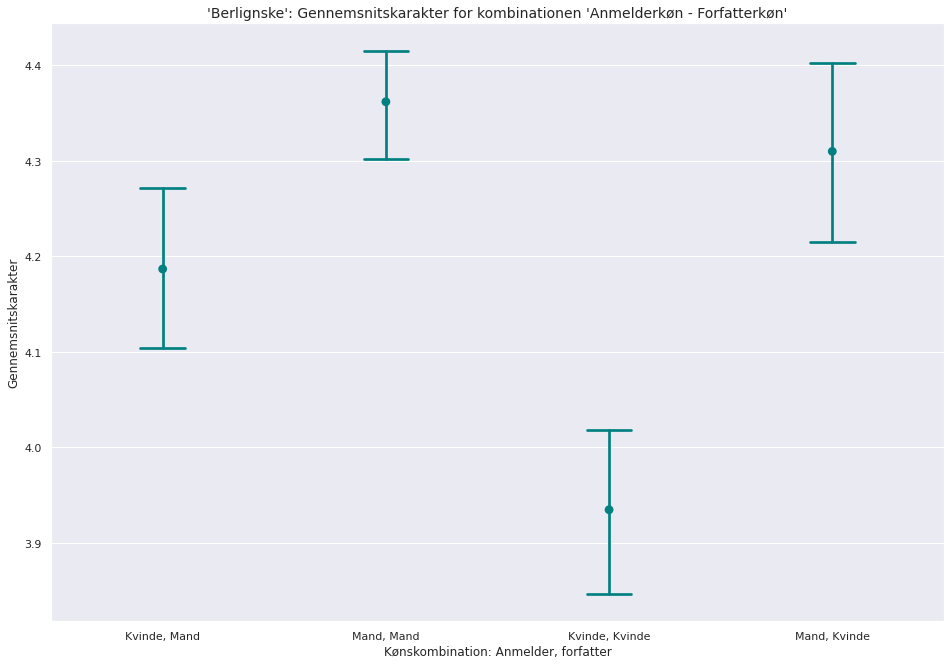

In [39]:
ax = sns.pointplot(x="gender_combi", y="grades_transformed_6", data=df_ber, join=False, ci = 95,capsize=0.2, marker = 'o', color = 'teal')

ax.figure.set_size_inches(16,11)
ax.set_title("'Berlignske': Gennemsnitskarakter for kombinationen 'Anmelderkøn - Forfatterkøn'",fontdict= { 'fontsize': 14, 'fontweight':'normal'})
ax.set_ylabel('Gennemsnitskarakter')
ax.set_xlabel('Kønskombination: Anmelder, forfatter')
ax.set_xticklabels(['Kvinde, Mand','Mand, Mand','Kvinde, Kvinde','Mand, Kvinde'])

Text(0.5, 1.0, "Kønsbalance i 'Berlingske' (normaliseret), 2010-2021")

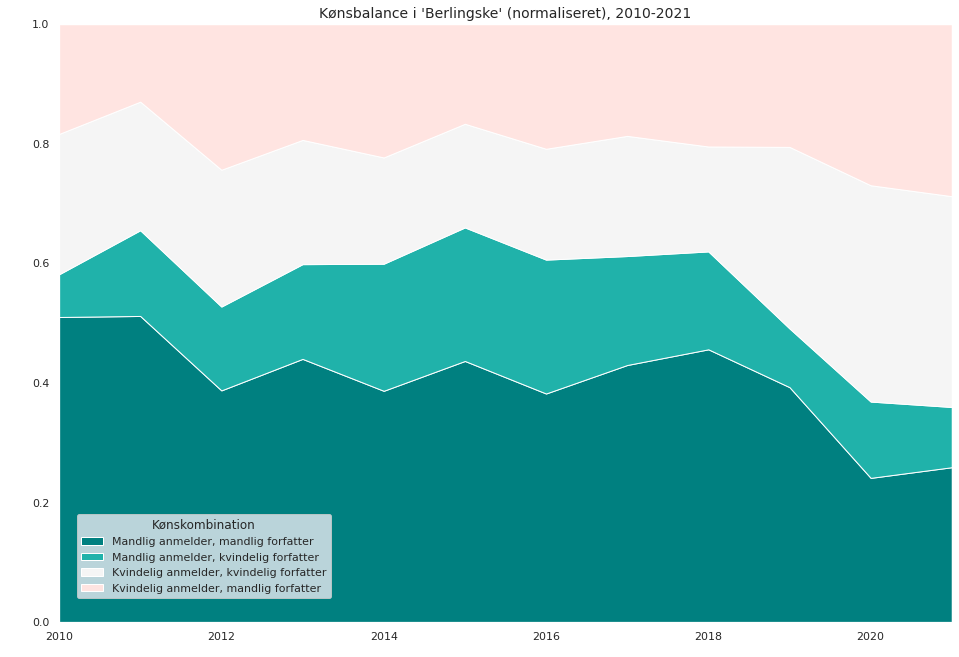

In [40]:
grouped_ber = df_ber.groupby(['year','gender_combi']).size().unstack()
normalized_ber = grouped_ber.div(grouped_ber.sum(axis=1),axis=0)

my_labels = ['Mandlig anmelder, mandlig forfatter','Mandlig anmelder, kvindelig forfatter','Kvindelig anmelder, kvindelig forfatter','Kvindelig anmelder, mandlig forfatter']

fig, ax = plt.subplots(figsize=(16,11))
sub_to_plot = normalized_ber[['male_male','male_female','female_female','female_male']]
ax.stackplot(sub_to_plot.index, sub_to_plot.T, labels=sub_to_plot.columns,colors= my_palette4)
fig.legend(my_labels, title="Kønskombination", loc=(0.08,0.09))

ax.autoscale(enable=True, axis='both', tight=True)
ax.set_title("Kønsbalance i 'Berlingske' (normaliseret), 2010-2021",fontdict= { 'fontsize': 14, 'fontweight':'normal'})


## Jyllands-Posten

Her gentager vi nogle af ovenstående analyser udelukkende på anmeldelser udgivet i JP.

Karakterer og kønskombination: 

- Kvindelig anmelder og kvindelig forfatter: **3.6995**
- Kvindelig anmelder og mandlig forfatter: 3.6995 + 0.1090  = **3.8085**
- Mandlig anmelder og kvindelig forfatter:  3.6995 + 0.3241  = **4.0236**
- Mandlig anmelder og mandlig forfatter:  3.6995 + 0.4952 = **4.1947**

In [41]:
# select reviews written in 'JP'
df_jp = df[(df['media_name'] == 'Jyllands-Posten')] 

model_h2 = smf.ols(formula='grades_transformed_6 ~ C(gender_combi)', data=df_jp)
res_h2 = model_h2.fit()

res_h2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     grades_transformed_6   R-squared:                       0.038
Model:                              OLS   Adj. R-squared:                  0.037
Method:                   Least Squares   F-statistic:                     40.34
Date:                  Fri, 06 May 2022   Prob (F-statistic):           1.44e-25
Time:                          10:31:07   Log-Likelihood:                -4408.9
No. Observations:                  3097   AIC:                             8826.
Df Residuals:                      3093   BIC:                             8850.
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          3.6995      0.041     90.064      0.000       3.619       3.780
C(gender_combi)[T.female_male]     0.1090      0.066      1.648      0.099      -0.021       0.239
C(gender_combi)[T.male_female]     0.3241      0.056      5.751      0.000       0.214       0.435
C(gender_combi)[T.male_male]       0.4952      0.049     10.135      0.000       0.399       0.591
==============================================================================
Omnibus:                       30.595   Durbin-Watson:                   1.690
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.389
Skew:                          -0.246   Prob(JB):                     1.53e-07
Kurtosis:                       2.954   Cond. No.                         5.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[Text(0, 0, 'Kvinde, Mand'),
 Text(1, 0, 'Mand, Mand'),
 Text(2, 0, 'Kvinde, Kvinde'),
 Text(3, 0, 'Mand, Kvinde')]

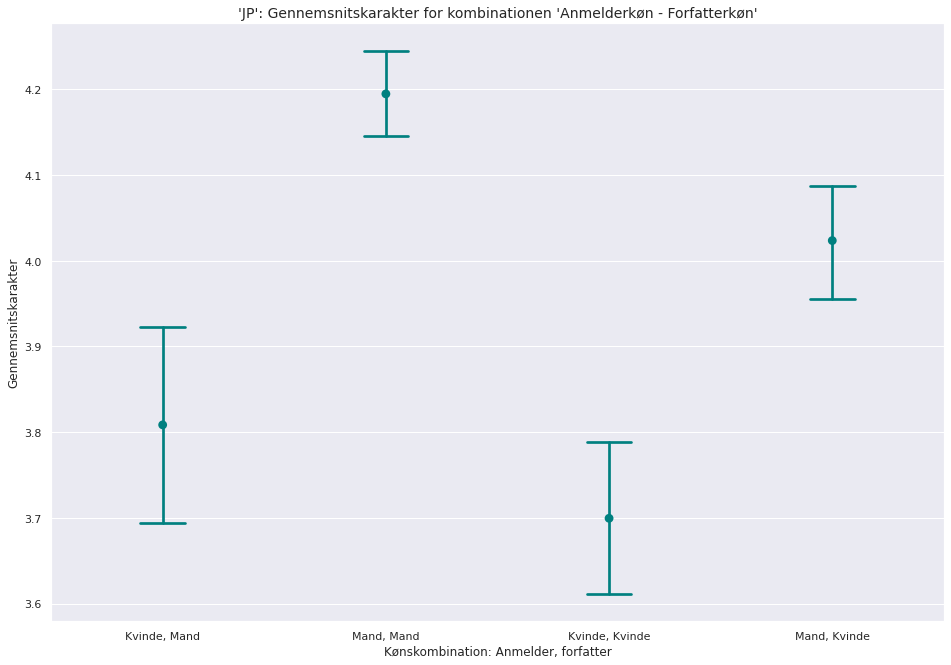

In [42]:
ax = sns.pointplot(x="gender_combi", y="grades_transformed_6", data=df_jp, join=False, ci = 95,capsize=0.2, marker = 'o', color = 'teal')

ax.figure.set_size_inches(16,11)
ax.set_title("'JP': Gennemsnitskarakter for kombinationen 'Anmelderkøn - Forfatterkøn'",fontdict= { 'fontsize': 14, 'fontweight':'normal'})
ax.set_ylabel('Gennemsnitskarakter')
ax.set_xlabel('Kønskombination: Anmelder, forfatter')
ax.set_xticklabels(['Kvinde, Mand','Mand, Mand','Kvinde, Kvinde','Mand, Kvinde'])

Text(0.5, 1.0, "Kønsbalance i 'JP' (normaliseret), 2010-2021")

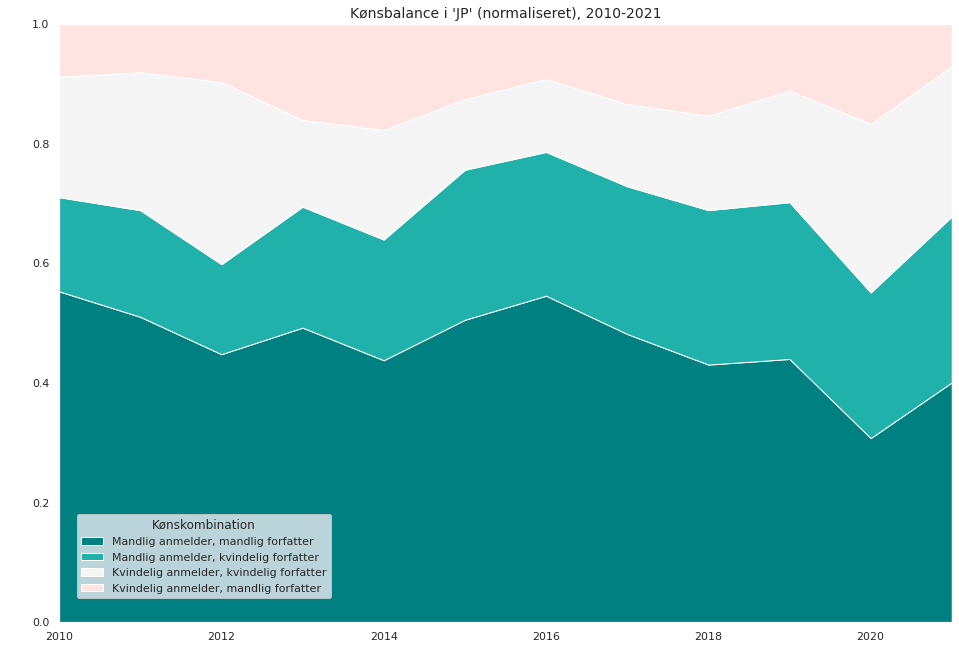

In [43]:
grouped_jp = df_jp.groupby(['year','gender_combi']).size().unstack()
normalized_jp = grouped_jp.div(grouped_jp.sum(axis=1),axis=0)

my_labels = ['Mandlig anmelder, mandlig forfatter','Mandlig anmelder, kvindelig forfatter','Kvindelig anmelder, kvindelig forfatter','Kvindelig anmelder, mandlig forfatter']

fig, ax = plt.subplots(figsize=(16,11))
sub_to_plot = normalized_jp[['male_male','male_female','female_female','female_male']]
ax.stackplot(sub_to_plot.index, sub_to_plot.T, labels=sub_to_plot.columns,colors= my_palette4)
fig.legend(my_labels, title="Kønskombination", loc=(0.08,0.09))

ax.autoscale(enable=True, axis='both', tight=True)
ax.set_title("Kønsbalance i 'JP' (normaliseret), 2010-2021",fontdict= { 'fontsize': 14, 'fontweight':'normal'})